## Final Project Submission

* Student name: Marvin Mills
* Student pace: part-time
* Scheduled project review date/time: 
* Instructor name: Yish Lim
* Blog post URL:


# Getting Started
To start, I'll import everything I see as necessary to get this done. I've imported the usual suspects -- pandas, numpy, matplotlib -- but also, I'll be importing "Time" to do API request rests as well as "Locale" and "FuncFormatter" which I'm hoping both will help with displaying currency on the visualizations.

Moreover, I'll be primarily, if not exclusively, using <b>TMDBSimple</b> to complete this research & recommendation for Microsoft. I've also gone ahead and found out how to call my API key without showing my API key here in the notebook. It also shouldn't show when I push to Github.

In [3]:
import emoji
print(emoji.emojize("Let's get started!!!" ":thumbs_up:"))

Let's get started!!!👍


In [4]:
#Importing all of the important items here
import pandas as pd
import numpy as np
import locale
import time
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as tickie
import squarify
import seaborn as sns
from matplotlib.ticker import FuncFormatter
locale.setlocale( locale.LC_ALL, '' )

'English_United States.1252'

In [5]:
#Importing tmdbsimple as well as config so as to keep API Key hidden.
import tmdbsimple as tmdb
import config
tmdb.API_KEY = config.api_key

# Before The Work: Getting To Know The Data + Determining Approach

This first section -- below -- is where I get to know the nature of the data, while using tmdb simple. My goal is to determine what columns there are, and this will help me to decide on which questions I'd like to ask.

In [6]:
#Initial, manual accessing of the dataset per the "response" list found at: 
#https://developers.themoviedb.org/3/movies/get-movie-details

cool = 2
movie = tmdb.Movies(cool)
response = movie.info()

#These represent the diversity of information available for the movies in the database. There is more, of course.
print(movie.title)
print(movie.budget)
print(movie.revenue)
print(movie.release_date)
print(movie.runtime)
print(movie.genres)
print(movie.tagline)
print(movie.status)
print(movie.popularity)
print(movie.overview)

Ariel
0
0
1988-10-21
73
[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name': 'Crime'}, {'id': 35, 'name': 'Comedy'}]

Released
9.111
Taisto Kasurinen is a Finnish coal miner whose father has just committed suicide and who is framed for a crime he did not commit. In jail, he starts to dream about leaving the country and starting a new life. He escapes from prison but things don't go as planned...


## *** Accessing The Data ***
The good thing is that I can see clearly what the data looks like. But now, the goal is to figure out how to loop through the data to get this information for <b>1000 movies from the database</b>. I wonder whether I can loop through the data using the "movie.info()" method. When trying to loop through using <b>a range of numbers</b> there is a <b>404 Error</b> that comes up with some numbers. So, I'll need to find a better way.

In [17]:
#cooler = [900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916]
#Used the above to test what happens when looping through the dataset

#NOTE: It's 915 that breaks the code in "cooler" and brings up the 404 error.

#pop_1000_ids is a variable introduced in a cell below to make the code work.
#Prior to this, I was using the "cooler" variable to test the loop, as mentioned above.
#The id's from pop_1000_ids are taken from looping through the "movie.popular()" method (see below)

leggo_my_eggo = pop_1000_ids
shaquille = []
counter = 1

for i in leggo_my_eggo:
    if counter < 5:
        movie = tmdb.Movies(i)
        response = movie.info()
        shaquille.append(response)
        print(movie.title, movie.budget, movie.revenue)
        counter += 1

Work It 0 0
The Secret Garden 0 0
The Tax Collector 30000000 0
The Kissing Booth 2 0 0


## Iterating Through The Data: First Attempts

Now, let's use the "movie.popular()" method to loop through the Most Popular films from TMDB. In order to do this effectively, I'll be using "time.sleep" which will make the loop "rest" for a certain period so as not to access the API too quickly (I'm actually not sure whether my request is even considered "too much" but just in case I wanted to use the "time.sleep" option. I also see it as a good habit to form perhaps.

So, what I'll be doing here is:
<br>
<b>Loop through 50 pages of TMDB results, to get 1000 movies.</b>
<br>
I'll add the 1000 movies' info into a list (so it'll be a dictionary within a list), and then store the IDs and the Titles of the films into two different lists, respectively. I'll also check the length of the "popular_dict" list to verify whether there are 1000 entries.



In [8]:
print(type(tmdb.Movies()))

<class 'tmdbsimple.movies.Movies'>


In [9]:
a = tmdb.Movies()
abc = a.popular()

In [10]:
#I found some good insight and guidance for this here: 
#https://spandan-madan.github.io/DeepLearningProject/

popular_dict = []
pop_1000_ids = []
pop_1000_titles = []
for i in (range(1,51)):
    if i%15 == 0:
        time.sleep(7)
    doop = a.popular(page=i)['results']
    popular_dict.extend(doop)

print(doop[1]['title'])
print(popular_dict[1]['title'])
len(popular_dict)

Wreck-It Ralph
The Secret Garden


1000

## Successfully Stored Movies Into List. What's Next?

Now, I'll check the data a bit to see what's inside. I'll also run a For Loop to add the Titles and the IDs to their own lists. What I'm hoping to do is to be able to use these to call data from the "movie.info()" method, instead of looping through the data from 0 to 20, for example.
<br>
<b>OK, let's check for what's inside, run the For Loop to store Titles and IDs, as well as verify these as well.</b>

In [11]:
popular_dict[0]

{'popularity': 133.986,
 'vote_count': 308,
 'video': False,
 'poster_path': '/b5XfICAvUe8beWExBz97i0Qw4Qh.jpg',
 'id': 612706,
 'adult': False,
 'backdrop_path': '/ishzDCZIv9iWfI70nv5E4ZreYUD.jpg',
 'original_language': 'en',
 'original_title': 'Work It',
 'genre_ids': [35, 10402],
 'title': 'Work It',
 'vote_average': 8,
 'overview': "A brilliant but clumsy high school senior vows to get into her late father's alma mater by transforming herself and a misfit squad into dance champions.",
 'release_date': '2020-08-07'}

In [18]:
doop[0]

{'popularity': 19.75,
 'vote_count': 985,
 'video': False,
 'poster_path': '/79vujbsWEbX4dzffBV541QXN6sf.jpg',
 'id': 10494,
 'adult': False,
 'backdrop_path': '/e8Wt7n3QEu6wlZONUDjJuNusptl.jpg',
 'original_language': 'ja',
 'original_title': 'パーフェクトブルー',
 'genre_ids': [16, 53],
 'title': 'Perfect Blue',
 'vote_average': 8.2,
 'overview': "A retired pop singer turned actress' sense of reality is shaken when she is stalked by an obsessed fan and seemingly a ghost of her past.",
 'release_date': '1997-07-25'}

In [13]:
#Looping through the dictionary created to append the IDs and Titles to lists.
for i in popular_dict:
    pop_1000_ids.append(i['id'])
    pop_1000_titles.append(i['title'])
print(pop_1000_ids[0:20])
print(pop_1000_titles[0:20])

[612706, 521034, 531499, 583083, 475557, 659991, 385103, 27205, 703745, 299536, 430155, 703771, 516486, 605116, 157336, 271110, 480923, 495764, 653598, 496243]
['Work It', 'The Secret Garden', 'The Tax Collector', 'The Kissing Booth 2', 'Joker', 'Made in Italy', 'Scoob!', 'Inception', 'Deep Blue Sea 3', 'Avengers: Infinity War', 'Coma', 'Deathstroke: Knights & Dragons - The Movie', 'Greyhound', 'Project Power', 'Interstellar', 'Captain America: Civil War', 'Dead Ant', 'Birds of Prey (and the Fantabulous Emancipation of One Harley Quinn)', 'Spree', 'Parasite']


In [14]:
#Checking to see whether this ID matches with the ID above.
popular_dict[5]['id']

659991

## Turning List With Nested Dictionary Into a DataFrame

Now that I have the dictionary-organized data stored as a list (therefore as a dictionary within a list), I'll need to figure out how to create a DataFrame from this type of data (see below for the <b>type</b> of data the variable popular_dict stores as the first entry in the list). It's a <b>dictionary</b> as demonstrated below by checking the "type" of the dataset. So, what I'll do is use this data to create the main DataFrame I'll need.

In [19]:
print(type(popular_dict[0]))
print('---')
print(popular_dict[0].keys())
print('---')
print(popular_dict[0])

<class 'dict'>
---
dict_keys(['popularity', 'vote_count', 'video', 'poster_path', 'id', 'adult', 'backdrop_path', 'original_language', 'original_title', 'genre_ids', 'title', 'vote_average', 'overview', 'release_date'])
---
{'popularity': 133.986, 'vote_count': 308, 'video': False, 'poster_path': '/b5XfICAvUe8beWExBz97i0Qw4Qh.jpg', 'id': 612706, 'adult': False, 'backdrop_path': '/ishzDCZIv9iWfI70nv5E4ZreYUD.jpg', 'original_language': 'en', 'original_title': 'Work It', 'genre_ids': [35, 10402], 'title': 'Work It', 'vote_average': 8, 'overview': "A brilliant but clumsy high school senior vows to get into her late father's alma mater by transforming herself and a misfit squad into dance champions.", 'release_date': '2020-08-07'}


In [20]:
#Just in case I need to set columns at some point perhaps this will come in handy?
main_film_dict_columns = list(popular_dict[0])
main_film_dict_columns

['popularity',
 'vote_count',
 'video',
 'poster_path',
 'id',
 'adult',
 'backdrop_path',
 'original_language',
 'original_title',
 'genre_ids',
 'title',
 'vote_average',
 'overview',
 'release_date']

## Creating The Main DataFrame

OK, now to create the DataFrame and check all of the data a bit. It was a lot simpler than I'd expected.

In [21]:
#Creating the DataFrame from the Dictionary formed in a previous cell.
main_movie_df = pd.DataFrame(popular_dict)
main_movie_df.tail()

popularity  vote_count  video                       poster_path      id  \
995      19.692        4880  False  /7sf9CgJz30aXDvrg7DYYUQ2U91T.jpg     389   
996      19.687        3803  False  /85R8LMyn9f2Lev2YPBF8Nughrkv.jpg  445571   
997      19.678        1260  False  /cJZpKgiFfjDZ6L5aOJvbmDhsGqY.jpg  203739   
998      19.671        1074  False  /9uqCaPEIep4iBG3U4AqSP20LGjq.jpg  151960   
999      19.670        7977  False  /wrJjDB8SSJJKcpXVf4KAxZIHvBZ.jpg    8681   

     adult                     backdrop_path original_language  \
995  False  /qqHQsStV6exghCM7zbObuYBiYxw.jpg                en   
996  False  /4hU1pC7MGQ7wU9ldkRJYNHK3vgb.jpg                en   
997  False  /cZLCTpRnDkml7Wu8y5GSiKZ1xT7.jpg                en   
998  False  /1BaUaXBRKzwNESZ6hZkZjelatmt.jpg                en   
999  False  /uyusXmEyS7QI1BMxAlvbXSLxJxI.jpg                en   

      original_title            genre_ids            title  vote_average  \
995     12 Angry Men                 [18]     12 Angry Men           8.4   
996       Game Night       [9648, 35, 80]       Game Night           6.8   
997  Vampire Academy         [35, 28, 14]  Vampire Academy           6.2   
998           Planes  [16, 10751, 12, 35]           Planes           5.8   
999            Taken             [28, 53]            Taken           7.3   

                                              overview release_date  
995  The defense and the prosecution have rested an...   1957-04-10  
996  Max and Annie's weekly game night gets kicked ...   2018-02-22  
997  Rose, a rebellious half-vampire/half-human gua...   2014-02-07  
998  Dusty is a cropdusting plane who dreams of com...   2013-08-09  
999  While vacationing with a friend in Paris, an A...   2008-02-18

## Learning From Early Exploration of the Data & Creating DF Copy

It takes time to sift through datasets just right, but I'm glad to actually see this all in dictionary form. I'll be creating a copy of the dictionary as well, just in case.
<br>
<b>Why?</b> I want to be able to explore the DataFrame without concern for mixing something up and compromising my DataFrame.

In [22]:
main_movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
popularity           1000 non-null float64
vote_count           1000 non-null int64
video                1000 non-null bool
poster_path          995 non-null object
id                   1000 non-null int64
adult                1000 non-null bool
backdrop_path        975 non-null object
original_language    1000 non-null object
original_title       1000 non-null object
genre_ids            1000 non-null object
title                1000 non-null object
vote_average         1000 non-null float64
overview             1000 non-null object
release_date         1000 non-null object
dtypes: bool(2), float64(2), int64(2), object(8)
memory usage: 95.8+ KB


In [23]:
main_movie_df.keys()

Index(['popularity', 'vote_count', 'video', 'poster_path', 'id', 'adult',
       'backdrop_path', 'original_language', 'original_title', 'genre_ids',
       'title', 'vote_average', 'overview', 'release_date'],
      dtype='object')

In [24]:
copy_mmdf = main_movie_df

In [25]:
copy_mmdf

popularity  vote_count  video                       poster_path      id  \
0       133.986         308  False  /b5XfICAvUe8beWExBz97i0Qw4Qh.jpg  612706   
1       111.711          68  False   /5MSDwUcqnGodFTvtlLiLKK0XKS.jpg  521034   
2        97.752          55  False  /3eg0kGC2Xh0vhydJHO37Sp4cmMt.jpg  531499   
3        88.162        3023  False  /mb7wQv0adK3kjOUr9n93mANHhPJ.jpg  583083   
4        83.866       14262  False  /udDclJoHjfjb8Ekgsd4FDteOkCU.jpg  475557   
..          ...         ...    ...                               ...     ...   
995      19.692        4880  False  /7sf9CgJz30aXDvrg7DYYUQ2U91T.jpg     389   
996      19.687        3803  False  /85R8LMyn9f2Lev2YPBF8Nughrkv.jpg  445571   
997      19.678        1260  False  /cJZpKgiFfjDZ6L5aOJvbmDhsGqY.jpg  203739   
998      19.671        1074  False  /9uqCaPEIep4iBG3U4AqSP20LGjq.jpg  151960   
999      19.670        7977  False  /wrJjDB8SSJJKcpXVf4KAxZIHvBZ.jpg    8681   

     adult                     backdrop_path original_language  \
0    False  /ishzDCZIv9iWfI70nv5E4ZreYUD.jpg                en   
1    False  /8PK4X8U3C79ilzIjNTkTgjmc4js.jpg                en   
2    False  /zogWnCSztU8xvabaepQnAwsOtOt.jpg                en   
3    False  /wO5QSWZPBT71gMLvrRex0bVc0V9.jpg                en   
4    False  /n6bUvigpRFqSwmPp1m2YADdbRBc.jpg                en   
..     ...                               ...               ...   
995  False  /qqHQsStV6exghCM7zbObuYBiYxw.jpg                en   
996  False  /4hU1pC7MGQ7wU9ldkRJYNHK3vgb.jpg                en   
997  False  /cZLCTpRnDkml7Wu8y5GSiKZ1xT7.jpg                en   
998  False  /1BaUaXBRKzwNESZ6hZkZjelatmt.jpg                en   
999  False  /uyusXmEyS7QI1BMxAlvbXSLxJxI.jpg                en   

          original_title            genre_ids                title  \
0                Work It          [35, 10402]              Work It   
1      The Secret Garden      [18, 14, 10751]    The Secret Garden   
2      The Tax Collector     [28, 80, 18, 53]    The Tax Collector   
3    The Kissing Booth 2          [35, 10749]  The Kissing Booth 2   
4                  Joker         [80, 18, 53]                Joker   
..                   ...                  ...                  ...   
995         12 Angry Men                 [18]         12 Angry Men   
996           Game Night       [9648, 35, 80]           Game Night   
997      Vampire Academy         [35, 28, 14]      Vampire Academy   
998               Planes  [16, 10751, 12, 35]               Planes   
999                Taken             [28, 53]                Taken   

     vote_average                                           overview  \
0             8.0  A brilliant but clumsy high school senior vows...   
1             7.5  Mary Lennox is born in India to wealthy Britis...   
2             6.1  David Cuevas is a family man who works as a ga...   
3             8.1  With college decisions looming, Elle juggles h...   
4             8.2  During the 1980s, a failed stand-up comedian i...   
..            ...                                                ...   
995           8.4  The defense and the prosecution have rested an...   
996           6.8  Max and Annie's weekly game night gets kicked ...   
997           6.2  Rose, a rebellious half-vampire/half-human gua...   
998           5.8  Dusty is a cropdusting plane who dreams of com...   
999           7.3  While vacationing with a friend in Paris, an A...   

    release_date  
0     2020-08-07  
1     2020-07-08  
2     2020-08-07  
3     2020-07-24  
4     2019-10-02  
..           ...  
995   1957-04-10  
996   2018-02-22  
997   2014-02-07  
998   2013-08-09  
999   2008-02-18  

[1000 rows x 14 columns]

#  🧗🏿 🌍 👨🏿‍🚀 My Questions:
OK! So, now it looks like I can start organizing, sorting and harnessing the data according to the questions I'd like to get answers for! 
<br><b>Here are the questions I'll be asking:</b>

<br> <b>First:</b> Which 20 production companies have been involved with the 100 top-earning films over the last 36 months, and in which genre are the respective films?

<br> <b>Second:</b> Is there a positive correlation between popularity and income in the last 36 months?

<br> <b>Third:</b> Which 10 non-English language films have the highest popularity score in the last 5 years?

<br> <b>Fourth:</b> Which genres are the most popular among films released in the last 6 mos.?

<br> <b>Fifth:</b> Which genres have the most films in production at the moment?

## <br> *** NOTE: A Word On Why I've Chosen These Questions ***
Upon doing initial research, I learned that, <i>"across all Hollywood studio movies, the average time between the first announcement and eventual release date is 871 days – or two years, four months and nineteen days."</i> What I also learned is that Comedy and Romance films have the shortest time from first announcement to eventual release. Understanding all of this, I think there could be value for Microsoft leadership in understanding first what <b>production companies'</b> activities have been, as related to <b>genre-specific investment</b> and <b>revenue generation.</b>
<br>
<br>
Moreover, <b>popularity</b> is a key factor in making this decision as well, and so I'll like to investigate which films are the most popular, but just over the last 6 months, as this could help to identify further questions to ask about "popular" films, to determine the reason for their popularity in such a short time. <b>Could it be the films' marketing strategy?</b> Or, perhaps there is an actor or actress which draws a lot of interest? Understanding that these films would've been invested in, on average, over two years ago, it may benefit to dive deeper into why they've been so successful and in such short time.
<br>
<br>
Lastly, to touch upon the existence of internationally-sourced films, I'll explore non-English language films, or films that have been wildly successful but whose original language is not English. <b>The assumption here is that internationally-sourced films that thrive in today's movie market have had either the investment, ingredients or both to generate "impressive" revenue,</b> and these films could be the types of films Microsoft leadership should consider if or when deciding to launch a movie studio segment.
<br>
<br>
Ultimately, the goal is to help Microsoft leadership understand <b>where money is flowing</b>, how popularity feedback provided online correlates to where money is flowing, and at the end, whether starting a movie studio segment makes sense and, <b>providing recommendation on the types of films to focus on.</b>

---

#    🧗🏿 🌍 👨🏿‍🚀  1st Question:
## Which 20 production companies have been involved with the 100 top-earning films over the last 36 months, and what's the most prevalent genre among these films?

So, now what I'll do is use my list of IDs I got from "movies.popular()" to pull data from "movies.info()". First, to get a look at the fuller amount of information available I'll look at the first entry. It's clear that there's a whole lot more information available per movie entry.

---

In [26]:

#Getting a look at the data for an entry once more.

leggo_my_eggo = pop_1000_ids
#counts = 1
shaqshaq = []

for j in leggo_my_eggo:
    movie = tmdb.Movies(j)
    response = movie.info()
    shaqshaq.append(response)
        
shaqshaq[0]

{'adult': False,
 'backdrop_path': '/ishzDCZIv9iWfI70nv5E4ZreYUD.jpg',
 'belongs_to_collection': None,
 'budget': 0,
 'genres': [{'id': 35, 'name': 'Comedy'}, {'id': 10402, 'name': 'Music'}],
 'homepage': 'https://www.netflix.com/title/81132038',
 'id': 612706,
 'imdb_id': 'tt10276470',
 'original_language': 'en',
 'original_title': 'Work It',
 'overview': "A brilliant but clumsy high school senior vows to get into her late father's alma mater by transforming herself and a misfit squad into dance champions.",
 'popularity': 133.986,
 'poster_path': '/b5XfICAvUe8beWExBz97i0Qw4Qh.jpg',
 'production_companies': [{'id': 47729,
   'logo_path': '/5NRpQ7xxmODXAjt2pRWUFMLVzvP.png',
   'name': 'STX Entertainment',
   'origin_country': 'US'},
  {'id': 10067,
   'logo_path': '/p1kZoVNfkVvk7xyJZEposRxcfh8.png',
   'name': 'Alloy Entertainment',
   'origin_country': 'US'},
  {'id': 137361,
   'logo_path': None,
   'name': 'AK Worldwide',
   'origin_country': 'US'}],
 'production_countries': [{'iso_

In [27]:
shaqshaq_col_names = list(shaqshaq[0].keys())
shaqshaq_df = pd.DataFrame(shaqshaq,columns=shaqshaq_col_names)
pd.set_option('display.max_columns',None)
shaqshaq_df.head()

adult                     backdrop_path  \
0  False  /ishzDCZIv9iWfI70nv5E4ZreYUD.jpg   
1  False  /8PK4X8U3C79ilzIjNTkTgjmc4js.jpg   
2  False  /zogWnCSztU8xvabaepQnAwsOtOt.jpg   
3  False  /wO5QSWZPBT71gMLvrRex0bVc0V9.jpg   
4  False  /n6bUvigpRFqSwmPp1m2YADdbRBc.jpg   

                               belongs_to_collection    budget  \
0                                               None         0   
1                                               None         0   
2                                               None  30000000   
3  {'id': 726619, 'name': 'The Kissing Booth Coll...         0   
4                                               None  55000000   

                                              genres  \
0  [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   
1  [{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...   
2  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...   
4  [{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...   

                                 homepage      id     imdb_id  \
0  https://www.netflix.com/title/81132038  612706  tt10276470   
1                                          521034   tt2702920   
2                                          531499   tt8461224   
3  https://www.netflix.com/title/81026818  583083   tt9784456   
4              http://www.jokermovie.net/  475557   tt7286456   

  original_language       original_title  \
0                en              Work It   
1                en    The Secret Garden   
2                en    The Tax Collector   
3                en  The Kissing Booth 2   
4                en                Joker   

                                            overview  popularity  \
0  A brilliant but clumsy high school senior vows...     133.986   
1  Mary Lennox is born in India to wealthy Britis...     111.711   
2  David Cuevas is a family man who works as a ga...      97.752   
3  With college decisions looming, Elle juggles h...      88.162   
4  During the 1980s, a failed stand-up comedian i...      83.866   

                        poster_path  \
0  /b5XfICAvUe8beWExBz97i0Qw4Qh.jpg   
1   /5MSDwUcqnGodFTvtlLiLKK0XKS.jpg   
2  /3eg0kGC2Xh0vhydJHO37Sp4cmMt.jpg   
3  /mb7wQv0adK3kjOUr9n93mANHhPJ.jpg   
4  /udDclJoHjfjb8Ekgsd4FDteOkCU.jpg   

                                production_companies  \
0  [{'id': 47729, 'logo_path': '/5NRpQ7xxmODXAjt2...   
1  [{'id': 437, 'logo_path': '/nu20mtwbEIhUNnQ5NX...   
2  [{'id': 10246, 'logo_path': '/rREvQNWAxkDfY9CD...   
3  [{'id': 104090, 'logo_path': '/kBKzEDKymaAjhs2...   
4  [{'id': 9993, 'logo_path': '/2Tc1P3Ac8M479naPp...   

                                production_countries release_date     revenue  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-07           0   
1  [{'iso_3166_1': 'GB', 'name': 'United Kingdom'...   2020-07-08           0   
2  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-07           0   
3  [{'iso_3166_1': 'GB', 'name': 'United Kingdom'...   2020-07-24           0   
4  [{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...   2019-10-02  1074251311   

   runtime                                   spoken_languages    status  \
0     93.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1     99.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
2     95.0  [{'iso_639_1': 'es', 'name': 'Español'}, {'iso...  Released   
3    132.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
4    122.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                    tagline                title  video  \
0                   Dance to your own beat.              Work It  False   
1                                              The Secret Garden  False   
2              Payback comes with interest.    The Tax Collector  False   
3  Rules can be broken...but so can hearts.  The Kissing Booth 2  False   
4                      Put on a happy face

## Colleting All Production Company Names Together

OK, now that I've taken a look, what I'd like to do next is see if I can collect all the production company names into one list. Moreover, since there's a pretty good chance production companies have worked on numerous if not many films on the list, I'll want to make sure I create a list with <b>unique</b> values.

In [28]:
loopr_pc = shaqshaq_df['production_companies']

#Loop through the production company column for all 1000 movies
#Loop through each production company entry for the length of each of the 1000 movies (# of companies varies)
#Appending the 'name' of each production company to a master list of production companies in the dataset
#Printing the first 10 entries in that list

prod_comp_names = []
cowntr = 1
for p in loopr_pc:
    for i in p:
        prod_comp_names.append(i['name'])
        cowntr += 1
            
pcn = set(prod_comp_names)
unique_prod_companies = list(pcn)
#Leveraging the 'cowntr' to cross-check with the lengh of the list, to verify that a list of unique values is being formed.
print(cowntr)
print('---')
print(len(unique_prod_companies))
print('---')
print(unique_prod_companies)

3503
---
1507
---
['Tecmo', 'SVF Entertainment', 'Buckaroo Entertainment', 'Orion Pictures', 'The Rank Organisation', 'Original Film', 'Brandywine Productions', 'Red Wagon Entertainment', 'Evolution Entertainment', 'Altitude Film Entertainment', 'The Canadian Film or Video Production Tax Credit (CPTC)', 'Seesaw Productions', 'Good Fear', 'STORY inc.', 'dFlights', 'Kallouche Cinéma', 'Live Entertainment', 'Rezinate Entertainment', 'Storyville', 'Lynda Obst Productions', 'Matt Tolmach Productions', 'Limelight', 'Endeavor Content', 'Toscana Promozione', 'Cinesite Animation', 'Tokuma Japan Communications Co. Ltd.', 'MeMo Films', 'Infinite Detective', 'Universal Studios Home Entertainment', 'HorsePower Entertainment', 'TSG Entertainment', 'RedPeter Film', 'Cinema Fund', 'The Montecito Picture Company', 'Pioneer Stilking Films', 'Eon Productions', 'Ocean Park Entertainment', 'Mid Atlantic Films', 'TMS Entertainment', 'Maiden Voyage Pictures', '3 Art Entertainment', 'Clarius Entertainment', '

### Creating Columns Using Unique Production Company Names

Now, here is where I'll add columns using the <i>unique_prod_companies</i> variable.

In [29]:
#Use the Unique Production Companies list to create new columns for the DataFrame.

for i in unique_prod_companies:
    shaqshaq_df[i] = 0

shaqshaq_df.head()

adult                     backdrop_path  \
0  False  /ishzDCZIv9iWfI70nv5E4ZreYUD.jpg   
1  False  /8PK4X8U3C79ilzIjNTkTgjmc4js.jpg   
2  False  /zogWnCSztU8xvabaepQnAwsOtOt.jpg   
3  False  /wO5QSWZPBT71gMLvrRex0bVc0V9.jpg   
4  False  /n6bUvigpRFqSwmPp1m2YADdbRBc.jpg   

                               belongs_to_collection    budget  \
0                                               None         0   
1                                               None         0   
2                                               None  30000000   
3  {'id': 726619, 'name': 'The Kissing Booth Coll...         0   
4                                               None  55000000   

                                              genres  \
0  [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   
1  [{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...   
2  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...   
4  [{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...   

                                 homepage      id     imdb_id  \
0  https://www.netflix.com/title/81132038  612706  tt10276470   
1                                          521034   tt2702920   
2                                          531499   tt8461224   
3  https://www.netflix.com/title/81026818  583083   tt9784456   
4              http://www.jokermovie.net/  475557   tt7286456   

  original_language       original_title  \
0                en              Work It   
1                en    The Secret Garden   
2                en    The Tax Collector   
3                en  The Kissing Booth 2   
4                en                Joker   

                                            overview  popularity  \
0  A brilliant but clumsy high school senior vows...     133.986   
1  Mary Lennox is born in India to wealthy Britis...     111.711   
2  David Cuevas is a family man who works as a ga...      97.752   
3  With college decisions looming, Elle juggles h...      88.162   
4  During the 1980s, a failed stand-up comedian i...      83.866   

                        poster_path  \
0  /b5XfICAvUe8beWExBz97i0Qw4Qh.jpg   
1   /5MSDwUcqnGodFTvtlLiLKK0XKS.jpg   
2  /3eg0kGC2Xh0vhydJHO37Sp4cmMt.jpg   
3  /mb7wQv0adK3kjOUr9n93mANHhPJ.jpg   
4  /udDclJoHjfjb8Ekgsd4FDteOkCU.jpg   

                                production_companies  \
0  [{'id': 47729, 'logo_path': '/5NRpQ7xxmODXAjt2...   
1  [{'id': 437, 'logo_path': '/nu20mtwbEIhUNnQ5NX...   
2  [{'id': 10246, 'logo_path': '/rREvQNWAxkDfY9CD...   
3  [{'id': 104090, 'logo_path': '/kBKzEDKymaAjhs2...   
4  [{'id': 9993, 'logo_path': '/2Tc1P3Ac8M479naPp...   

                                production_countries release_date     revenue  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-07           0   
1  [{'iso_3166_1': 'GB', 'name': 'United Kingdom'...   2020-07-08           0   
2  [{'iso_3166_1': 'US', 'name': 'United States o...   2020-08-07           0   
3  [{'iso_3166_1': 'GB', 'name': 'United Kingdom'...   2020-07-24           0   
4  [{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...   2019-10-02  1074251311   

   runtime                                   spoken_languages    status  \
0     93.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1     99.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
2     95.0  [{'iso_639_1': 'es', 'name': 'Español'}, {'iso...  Released   
3    132.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
4    122.0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                    tagline                title  video  \
0                   Dance to your own beat.              Work It  False   
1                                              The Secret Garden  False   
2              Payback comes with interest.    The Tax Collector  False   
3  Rules can be broken...but so can hearts.  The Kissing Booth 2  False   
4                      Put on a happy face

## A Different Approach: Explanation

After much trial and error I've decided to try this a different way. Instead, I'll use the function below which has a list comprehension included as well as a lambda/apply operation that I'll use. 

#### Reason? 

I was finding trouble changing the columns for each production company from "0" to "1", and so with another approach I've been able to successfully add in the production company names to the original DataFrame as well as account for whether each production company was involved with the respctive film.

With this, I'm looking to organize the data in such a way so that I can determine which production companies have been behind the highest and lowest grossing films in the last 24 months.

In [30]:
#Looping through the original DataFrame and comparing each production company name with the Unique Production Companies list.
#As well, creating a dictionary with filler data for each company 
#And then, updating the Value in the dictionary as each Company relates to the idividual movie.

def cool_func(row):
    counts = 0
    companies = [c['name'] for c in row['production_companies']]
    letsgo = {}
    
    for i in companies:
        letsgo[i] = 1
    for j in unique_prod_companies:        
        if j not in companies:
            letsgo[j] = 0
            
    return letsgo

In [31]:
#Now, to turn this into a DataFrame!

hmk = shaqshaq_df.apply(lambda r: cool_func(r), axis=1).to_list()
mo_counts = pd.DataFrame(hmk)
mo_counts

STX Entertainment  Alloy Entertainment  AK Worldwide  Tecmo  \
0                    1                    1             1      0   
1                    0                    0             0      0   
2                    0                    0             0      0   
3                    0                    0             0      0   
4                    0                    0             0      0   
..                 ...                  ...           ...    ...   
995                  0                    0             0      0   
996                  0                    0             0      0   
997                  0                    0             0      0   
998                  0                    0             0      0   
999                  0                    0             0      0   

     SVF Entertainment  Buckaroo Entertainment  Orion Pictures  \
0                    0                       0               0   
1                    0                       0               0   
2                    0                       0               0   
3                    0                       0               0   
4                    0                       0               0   
..                 ...                     ...             ...   
995                  0                       0               0   
996                  0                       0               0   
997                  0                       0               0   
998                  0                       0               0   
999                  0                       0               0   

     The Rank Organisation  Original Film  Brandywine Productions  \
0                        0              0                       0   
1                        0              0                       0   
2                        0              0                       0   
3                        0              0                       0   
4                        0              0                       0   
..                     ...            ...                     ...   
995                      0              0                       0   
996                      0              0                       0   
997                      0              0                       0   
998                      0              0                       0   
999                      0              0                       0   

     Red Wagon Entertainment  Evolution Entertainment  \
0                          0                        0   
1                          0                        0   
2                          0                        0   
3                          0                        0   
4                          0                        0   
..                       ...                      ...   
995                        0                        0   
996                        0                        0   
997                        0                        0   
998                        0                        0   
999                        0                        0   

     Altitude Film Entertainment  \
0                              0   
1                              0   
2                              0   
3                              0   
4                              0   
..                           ...   
995                            0   
996                            0   
997                            0   
998                            0   
999                            0   

     The Canadian Film or Video Production Tax Credit (CPTC)  \
0                                                    0         
1                                                    0         
2                                                    0         
3                                                    0         
4                                                    0         
..                                                 ...         


In [32]:
newshaq = shaqshaq_df.drop(columns=unique_prod_companies)
newshaq

adult                     backdrop_path  \
0    False  /ishzDCZIv9iWfI70nv5E4ZreYUD.jpg   
1    False  /8PK4X8U3C79ilzIjNTkTgjmc4js.jpg   
2    False  /zogWnCSztU8xvabaepQnAwsOtOt.jpg   
3    False  /wO5QSWZPBT71gMLvrRex0bVc0V9.jpg   
4    False  /n6bUvigpRFqSwmPp1m2YADdbRBc.jpg   
..     ...                               ...   
995  False  /qqHQsStV6exghCM7zbObuYBiYxw.jpg   
996  False  /4hU1pC7MGQ7wU9ldkRJYNHK3vgb.jpg   
997  False  /cZLCTpRnDkml7Wu8y5GSiKZ1xT7.jpg   
998  False  /1BaUaXBRKzwNESZ6hZkZjelatmt.jpg   
999  False  /uyusXmEyS7QI1BMxAlvbXSLxJxI.jpg   

                                 belongs_to_collection    budget  \
0                                                 None         0   
1                                                 None         0   
2                                                 None  30000000   
3    {'id': 726619, 'name': 'The Kissing Booth Coll...         0   
4                                                 None  55000000   
..                                                 ...       ...   
995                                               None    350000   
996                                               None  37000000   
997                                               None  30000000   
998  {'id': 270252, 'name': 'Planes Collection', 'p...  50000000   
999  {'id': 135483, 'name': 'Taken Collection', 'po...  25000000   

                                                genres  \
0    [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   
1    [{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...   
2    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
3    [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...   
4    [{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...   
..                                                 ...   
995                      [{'id': 18, 'name': 'Drama'}]   
996  [{'id': 9648, 'name': 'Mystery'}, {'id': 35, '...   
997  [{'id': 35, 'name': 'Comedy'}, {'id': 28, 'nam...   
998  [{'id': 16, 'name': 'Animation'}, {'id': 10751...   
999  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   

                                   homepage      id     imdb_id  \
0    https://www.netflix.com/title/81132038  612706  tt10276470   
1                                            521034   tt2702920   
2                                            531499   tt8461224   
3    https://www.netflix.com/title/81026818  583083   tt9784456   
4                http://www.jokermovie.net/  475557   tt7286456   
..                                      ...     ...         ...   
995                                             389   tt0050083   
996         http://www.gamenight-movie.com/  445571   tt2704998   
997                                          203739   tt1686821   
998                                          151960   tt1691917   
999                                            8681   tt0936501   

    original_language       original_title  \
0                  en              Work It   
1                  en    The Secret Garden   
2                  en    The Tax Collector   
3                  en  The Kissing Booth 2   
4                  en                Joker   
..                ...                  ...   
995                en         12 Angry Men   
996                en           Game Night   
997                en      Vampire Academy   
998                en               Planes   
999                en                Taken   

                                              overview  popularity  \
0    A brilliant but clumsy high school senior vows...     133.986   
1    Mary Lennox is born in India to wealthy Britis...     111.711   
2    David Cuevas is a family man who works as a ga...      97.752   
3    With college decisions looming, Elle juggles h...      88.162   
4    During the 1980s, a failed stand-up comedian i...      83.866   
..                                                 ...         ...   
995  The defense and the prosecution have rested an...      19.692

## Before DataFrame Concatenation: Determine How To "Judge" Production Companies

Before adding the Production Companies' columns to the original DataFrame, I'm going to create a new column that shows the "cashflow success" of each film, meaning, I'd like to know which films have the best net income according to the numbers provided. Now, I've noticed some of the entries don't contain information related to "revenue" or "budget," so depending on how many don't, I may want to integrate another dataset (perhaps from IMDB?) to hopefully find some useful numbers. Otherwise, I'll just go with what's provide.

Also, some of the films will not have a "Revenue" because they haven't yet been released, and that's fine. I'll just exclude them if so.

Now, to get "Net Income" I'll take the "revenues" column and subtract it from the "budget" column, and then store the answer in a column called <b>net_income</b>.

And for the 36-month focus, I'll wait so as to effectively combine the two DataFrames later (the original one and the production companies DF)

In [33]:
#Using .loc to call the revenue and budget columns to create the new net income column
newshaq['net_income'] = (newshaq.loc[:,'revenue'] - newshaq.loc[:,'budget'])
newshaq['net_income'] = newshaq['net_income'].astype('int64')
newshaq

adult                     backdrop_path  \
0    False  /ishzDCZIv9iWfI70nv5E4ZreYUD.jpg   
1    False  /8PK4X8U3C79ilzIjNTkTgjmc4js.jpg   
2    False  /zogWnCSztU8xvabaepQnAwsOtOt.jpg   
3    False  /wO5QSWZPBT71gMLvrRex0bVc0V9.jpg   
4    False  /n6bUvigpRFqSwmPp1m2YADdbRBc.jpg   
..     ...                               ...   
995  False  /qqHQsStV6exghCM7zbObuYBiYxw.jpg   
996  False  /4hU1pC7MGQ7wU9ldkRJYNHK3vgb.jpg   
997  False  /cZLCTpRnDkml7Wu8y5GSiKZ1xT7.jpg   
998  False  /1BaUaXBRKzwNESZ6hZkZjelatmt.jpg   
999  False  /uyusXmEyS7QI1BMxAlvbXSLxJxI.jpg   

                                 belongs_to_collection    budget  \
0                                                 None         0   
1                                                 None         0   
2                                                 None  30000000   
3    {'id': 726619, 'name': 'The Kissing Booth Coll...         0   
4                                                 None  55000000   
..                                                 ...       ...   
995                                               None    350000   
996                                               None  37000000   
997                                               None  30000000   
998  {'id': 270252, 'name': 'Planes Collection', 'p...  50000000   
999  {'id': 135483, 'name': 'Taken Collection', 'po...  25000000   

                                                genres  \
0    [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   
1    [{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...   
2    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
3    [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...   
4    [{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...   
..                                                 ...   
995                      [{'id': 18, 'name': 'Drama'}]   
996  [{'id': 9648, 'name': 'Mystery'}, {'id': 35, '...   
997  [{'id': 35, 'name': 'Comedy'}, {'id': 28, 'nam...   
998  [{'id': 16, 'name': 'Animation'}, {'id': 10751...   
999  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   

                                   homepage      id     imdb_id  \
0    https://www.netflix.com/title/81132038  612706  tt10276470   
1                                            521034   tt2702920   
2                                            531499   tt8461224   
3    https://www.netflix.com/title/81026818  583083   tt9784456   
4                http://www.jokermovie.net/  475557   tt7286456   
..                                      ...     ...         ...   
995                                             389   tt0050083   
996         http://www.gamenight-movie.com/  445571   tt2704998   
997                                          203739   tt1686821   
998                                          151960   tt1691917   
999                                            8681   tt0936501   

    original_language       original_title  \
0                  en              Work It   
1                  en    The Secret Garden   
2                  en    The Tax Collector   
3                  en  The Kissing Booth 2   
4                  en                Joker   
..                ...                  ...   
995                en         12 Angry Men   
996                en           Game Night   
997                en      Vampire Academy   
998                en               Planes   
999                en                Taken   

                                              overview  popularity  \
0    A brilliant but clumsy high school senior vows...     133.986   
1    Mary Lennox is born in India to wealthy Britis...     111.711   
2    David Cuevas is a family man who works as a ga...      97.752   
3    With college decisions looming, Elle juggles h...      88.162   
4    During the 1980s, a failed stand-up comedian i...      83.866   
..                                                 ...         ...   
995  The defense and the prosecution have rested an...      19.692

## Combining The Two DataFrames: SSDF + HMOK

Now, to combine the two DataFrames!

In [34]:
#And now, to attach this DataFrame with the original DataFrame shaqshaq.
grand_df = pd.concat([newshaq, mo_counts], axis=1)
grand_df

adult                     backdrop_path  \
0    False  /ishzDCZIv9iWfI70nv5E4ZreYUD.jpg   
1    False  /8PK4X8U3C79ilzIjNTkTgjmc4js.jpg   
2    False  /zogWnCSztU8xvabaepQnAwsOtOt.jpg   
3    False  /wO5QSWZPBT71gMLvrRex0bVc0V9.jpg   
4    False  /n6bUvigpRFqSwmPp1m2YADdbRBc.jpg   
..     ...                               ...   
995  False  /qqHQsStV6exghCM7zbObuYBiYxw.jpg   
996  False  /4hU1pC7MGQ7wU9ldkRJYNHK3vgb.jpg   
997  False  /cZLCTpRnDkml7Wu8y5GSiKZ1xT7.jpg   
998  False  /1BaUaXBRKzwNESZ6hZkZjelatmt.jpg   
999  False  /uyusXmEyS7QI1BMxAlvbXSLxJxI.jpg   

                                 belongs_to_collection    budget  \
0                                                 None         0   
1                                                 None         0   
2                                                 None  30000000   
3    {'id': 726619, 'name': 'The Kissing Booth Coll...         0   
4                                                 None  55000000   
..                                                 ...       ...   
995                                               None    350000   
996                                               None  37000000   
997                                               None  30000000   
998  {'id': 270252, 'name': 'Planes Collection', 'p...  50000000   
999  {'id': 135483, 'name': 'Taken Collection', 'po...  25000000   

                                                genres  \
0    [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   
1    [{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...   
2    [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
3    [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...   
4    [{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...   
..                                                 ...   
995                      [{'id': 18, 'name': 'Drama'}]   
996  [{'id': 9648, 'name': 'Mystery'}, {'id': 35, '...   
997  [{'id': 35, 'name': 'Comedy'}, {'id': 28, 'nam...   
998  [{'id': 16, 'name': 'Animation'}, {'id': 10751...   
999  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   

                                   homepage      id     imdb_id  \
0    https://www.netflix.com/title/81132038  612706  tt10276470   
1                                            521034   tt2702920   
2                                            531499   tt8461224   
3    https://www.netflix.com/title/81026818  583083   tt9784456   
4                http://www.jokermovie.net/  475557   tt7286456   
..                                      ...     ...         ...   
995                                             389   tt0050083   
996         http://www.gamenight-movie.com/  445571   tt2704998   
997                                          203739   tt1686821   
998                                          151960   tt1691917   
999                                            8681   tt0936501   

    original_language       original_title  \
0                  en              Work It   
1                  en    The Secret Garden   
2                  en    The Tax Collector   
3                  en  The Kissing Booth 2   
4                  en                Joker   
..                ...                  ...   
995                en         12 Angry Men   
996                en           Game Night   
997                en      Vampire Academy   
998                en               Planes   
999                en                Taken   

                                              overview  popularity  \
0    A brilliant but clumsy high school senior vows...     133.986   
1    Mary Lennox is born in India to wealthy Britis...     111.711   
2    David Cuevas is a family man who works as a ga...      97.752   
3    With college decisions looming, Elle juggles h...      88.162   
4    During the 1980s, a failed stand-up comedian i...      83.866   
..                                                 ...         ...   
995  The defense and the prosecution have rested an...      19.692

In [35]:
#Now, to check the DataFrame again, to verify everything looks good.
grand_df.tail()

adult                     backdrop_path  \
995  False  /qqHQsStV6exghCM7zbObuYBiYxw.jpg   
996  False  /4hU1pC7MGQ7wU9ldkRJYNHK3vgb.jpg   
997  False  /cZLCTpRnDkml7Wu8y5GSiKZ1xT7.jpg   
998  False  /1BaUaXBRKzwNESZ6hZkZjelatmt.jpg   
999  False  /uyusXmEyS7QI1BMxAlvbXSLxJxI.jpg   

                                 belongs_to_collection    budget  \
995                                               None    350000   
996                                               None  37000000   
997                                               None  30000000   
998  {'id': 270252, 'name': 'Planes Collection', 'p...  50000000   
999  {'id': 135483, 'name': 'Taken Collection', 'po...  25000000   

                                                genres  \
995                      [{'id': 18, 'name': 'Drama'}]   
996  [{'id': 9648, 'name': 'Mystery'}, {'id': 35, '...   
997  [{'id': 35, 'name': 'Comedy'}, {'id': 28, 'nam...   
998  [{'id': 16, 'name': 'Animation'}, {'id': 10751...   
999  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   

                            homepage      id    imdb_id original_language  \
995                                      389  tt0050083                en   
996  http://www.gamenight-movie.com/  445571  tt2704998                en   
997                                   203739  tt1686821                en   
998                                   151960  tt1691917                en   
999                                     8681  tt0936501                en   

      original_title                                           overview  \
995     12 Angry Men  The defense and the prosecution have rested an...   
996       Game Night  Max and Annie's weekly game night gets kicked ...   
997  Vampire Academy  Rose, a rebellious half-vampire/half-human gua...   
998           Planes  Dusty is a cropdusting plane who dreams of com...   
999            Taken  While vacationing with a friend in Paris, an A...   

     popularity                       poster_path  \
995      19.692  /7sf9CgJz30aXDvrg7DYYUQ2U91T.jpg   
996      19.687  /85R8LMyn9f2Lev2YPBF8Nughrkv.jpg   
997      19.678  /cJZpKgiFfjDZ6L5aOJvbmDhsGqY.jpg   
998      19.671  /9uqCaPEIep4iBG3U4AqSP20LGjq.jpg   
999      19.670  /wrJjDB8SSJJKcpXVf4KAxZIHvBZ.jpg   

                                  production_companies  \
995  [{'id': 60, 'logo_path': '/oJXpAs4I3W46e4dkaOE...   
996  [{'id': 12, 'logo_path': '/iaYpEp3LQmb8AfAtmTv...   
997  [{'id': 90892, 'logo_path': None, 'name': 'Mon...   
998  [{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...   
999  [{'id': 11845, 'logo_path': None, 'name': 'Win...   

                                  production_countries release_date  \
995  [{'iso_3166_1': 'US', 'name': 'United States o...   1957-04-10   
996  [{'iso_3166_1': 'US', 'name': 'United States o...   2018-02-22   
997  [{'iso_3166_1': 'US', 'name': 'United States o...   2014-02-07   
998  [{'iso_3166_1': 'US', 'name': 'United States o...   2013-08-09   
999  [{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...   2008-02-18   

       revenue  runtime                                   spoken_languages  \
995    1000000     97.0           [{'iso_639_1': 'en', 'name': 'English'}]   
996  117501013    100.0           [{'iso_639_1': 'en', 'name': 'English'}]   
997   15391979    104.0           [{'iso_639_1': 'en', 'name': 'English'}]   
998  219788712     91.0           [{'iso_639_1': 'en', 'name': 'English'}]   
999  226830568     94.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   

       status                                           tagline  \
995  Released  Life is in their hands. Death is on their minds.   
996  Released                                This is not a game   
997  Released                              They suck at school.   
998  Released                      From above the world of Cars   
999  Released  They took his daughter.  He'll take their lives.   

               title  video  vote_average  vote_count  net_income  \
995     

## Sorting Films

OK, now to get only the films released in the last 36 months.

<b>NOTE:</b> It's interesting to see the host of negative or zero numbers for the Net Income column, and this convinces me further that sorting the films according to release date could be helpful!

By looking at films released in the last 36 months, my goal is to focus on those films that perhaps have <b>gone through a release cycle of marketing campaigns and promotion</b> and have been released in the midst of the trend where moviegoers prefer enjoying films online to visiting theaters.

In [36]:
#First, to ensure the "release_date" column is in date format:

grand_df['release_date'] = pd.to_datetime(grand_df['release_date'])

#Now, to choose the start and end dates:

start_date = '01-01-2017'
end_date = '12-31-2019'

In [37]:
#Now, to filter according to these dates:

date_filter = (grand_df['release_date'] > start_date) & (grand_df['release_date'] <= end_date)
grand_df = grand_df.loc[date_filter]
grand_df

adult                     backdrop_path  \
4    False  /n6bUvigpRFqSwmPp1m2YADdbRBc.jpg   
9    False  /bOGkgRGdhrBYJSLpXaxhXVstddV.jpg   
10   False  /8HbqSozBJxv6UldR9lMUECUlbLI.jpg   
16   False  /sUnAK6VaypBQAMrYa9XU8tGcp9X.jpg   
19   False  /ApiBzeaa95TNYliSbQ8pJv4Fje7.jpg   
..     ...                               ...   
975  False  /arYvUXhpNRU2GQQut67P5cR0c5m.jpg   
990  False  /j3w3lT3ABvJsVE3byNOMCYmnGMB.jpg   
991  False  /9guoVF7zayiiUq5ulKQpt375VIy.jpg   
992  False  /61sbyO47yIpsMFyLhY1MWcqjg1Q.jpg   
996  False  /4hU1pC7MGQ7wU9ldkRJYNHK3vgb.jpg   

                                 belongs_to_collection     budget  \
4                                                 None   55000000   
9    {'id': 86311, 'name': 'The Avengers Collection...  300000000   
10                                                None    4000000   
16                                                None          0   
19                                                None   11363000   
..                                                 ...        ...   
975                                               None   20000000   
990                                               None    6000000   
991  {'id': 662002, 'name': 'My Hero Academia Colle...          0   
992                                               None   49000000   
996                                               None   37000000   

                                                genres  \
4    [{'id': 80, 'name': 'Crime'}, {'id': 53, 'name...   
9    [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
10   [{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...   
16   [{'id': 35, 'name': 'Comedy'}, {'id': 27, 'nam...   
19   [{'id': 35, 'name': 'Comedy'}, {'id': 53, 'nam...   
..                                                 ...   
975  [{'id': 878, 'name': 'Science Fiction'}, {'id'...   
990  [{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...   
991  [{'id': 16, 'name': 'Animation'}, {'id': 28, '...   
992  [{'id': 12, 'name': 'Adventure'}, {'id': 35, '...   
996  [{'id': 9648, 'name': 'Mystery'}, {'id': 35, '...   

                                              homepage      id     imdb_id  \
4                           http://www.jokermovie.net/  475557   tt7286456   
9    https://www.marvel.com/movies/avengers-infinit...  299536   tt4154756   
10                                                      430155   tt6087226   
16                                                      480923   tt5265898   
19                     https://www.parasite-movie.com/  496243   tt6751668   
..                                                 ...     ...         ...   
975             https://www.netflix.com/title/80195964  396806   tt5397194   
990                      https://www.brightburn.movie/  531309   tt7752126   
991                          https://heroaca-movie.com  592350  tt11107074   
992  https://www.paramount.com/movies/dora-and-lost...  499701   tt7547410   
996                    http://www.gamenight-movie.com/  445571   tt2704998   

    original_language                     original_title  \
4                  en                              Joker   
9                  en             Avengers: Infinity War   
10                 ru                               Кома   
16                 en                           Dead Ant   
19                 ko                                기생충   
..                ...                                ...   
975                en                               Anon   
990                en                         Brightburn   
991                ja  僕のヒーローアカデミア THE MOVIE ヒーローズ：ライジング   
992                en     Dora and the Lost City of Gold   
996                en                         Game Night   

                                              overview  popularity  \
4    During the 1980s, a failed stand-up comedian i...      83.866   
9    As the Avengers and their allies have continue...      74.181   
10   A young and talented architec

In [54]:
#OK, now to order the dataframe according to Net Income

grand_df = grand_df.sort_values(by = ['net_income'], ascending=False)
grand_df.head()

adult                     backdrop_path  \
63  False  /7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg   
9   False  /bOGkgRGdhrBYJSLpXaxhXVstddV.jpg   
74  False  /nRXO2SnOA75OsWhNhXstHB8ZmI3.jpg   
20  False  /xJWPZIYOEFIjZpBL7SVBGnzRYXp.jpg   
94  False  /6ELJEzQJ3Y45HczvreC3dg0GV5R.jpg   

                                belongs_to_collection     budget  \
63  {'id': 86311, 'name': 'The Avengers Collection...  356000000   
9   {'id': 86311, 'name': 'The Avengers Collection...  300000000   
74                                               None  260000000   
20  {'id': 386382, 'name': 'Frozen Collection', 'p...  150000000   
94                                               None  200000000   

                                               genres  \
63  [{'id': 12, 'name': 'Adventure'}, {'id': 878, ...   
9   [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   
74  [{'id': 12, 'name': 'Adventure'}, {'id': 10751...   
20  [{'id': 16, 'name': 'Animation'}, {'id': 10751...   
94  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   

                                             homepage      id    imdb_id  \
63     https://www.marvel.com/movies/avengers-endgame  299534  tt4154796   
9   https://www.marvel.com/movies/avengers-infinit...  299536  tt4154756   
74       https://movies.disney.com/the-lion-king-2019  420818  tt6105098   
20                 https://movies.disney.com/frozen-2  330457  tt4520988   
94  https://marvel.com/movies/movie/224/black_panther  284054  tt1825683   

   original_language          original_title  \
63                en       Avengers: Endgame   
9                 en  Avengers: Infinity War   
74                en           The Lion King   
20                en               Frozen II   
94                en           Black Panther   

                                             overview  popularity  \
63  After the devastating events of Avengers: Infi...      39.644   
9   As the Avengers and their allies have continue...      74.181   
74  Simba idolizes his father, King Mufasa, and ta...      38.869   
20  Elsa, Anna, Kristoff and Olaf head far into th...      61.823   
94  King T'Challa returns home from America to the...      36.440   

                         poster_path  \
63  /or06FN3Dka5tukK1e9sl16pB3iy.jpg   
9   /7WsyChQLEftFiDOVTGkv3hFpyyt.jpg   
74  /dzBtMocZuJbjLOXvrl4zGYigDzh.jpg   
20  /pjeMs3yqRmFL3giJy4PMXWZTTPa.jpg   
94  /uxzzxijgPIY7slzFvMotPv8wjKA.jpg   

                                 production_companies  \
63  [{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...   
9   [{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...   
74  [{'id': 2, 'logo_path': '/wdrCwmRnLFJhEoH8GSfy...   
20  [{'id': 6125, 'logo_path': '/tVPmo07IHhBs4Huil...   
94  [{'id': 420, 'logo_path': '/hUzeosd33nzE5MCNsZ...   

                                 production_countries release_date  \
63  [{'iso_3166_1': 'US', 'name': 'United States o...   2019-04-24   
9   [{'iso_3166_1': 'US', 'name': 'United States o...   2018-04-25   
74  [{'iso_3166_1': 'US', 'name': 'United States o...   2019-07-12   
20  [{'iso_3166_1': 'US', 'name': 'United States o...   2019-11-20   
94  [{'iso_3166_1': 'US', 'name': 'United States o...   2018-02-13   

       revenue  runtime                                   spoken_languages  \
63  2797800564    181.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
9   2046239637    149.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
74  1656943394    118.0           [{'iso_639_1': 'en', 'name': 'English'}]   
20  1450026933    104.0           [{'iso_639_1': 'en', 'name': 'English'}]   
94  1346739107    134.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   

      status                                tagline                   title  \
63  Released        Part of the journey is the end.       Avengers: Endgame   
9   Released  An entire universe. Once and for all.  Avengers: Infinity War   
74  Released                 The King has Returned.           The Lion King   
20  Released      

In [55]:
#Getting a list of the specific production companies involved in the top-earning films in the last 36 months
#I've found it useful to have just in case.

grand_df_cols = list(grand_df.columns.values)
company_shortlist_cols = grand_df_cols[26:]
company_shortlist_cols

['STX Entertainment',
 'Alloy Entertainment',
 'AK Worldwide',
 'Tecmo',
 'SVF Entertainment',
 'Buckaroo Entertainment',
 'Orion Pictures',
 'The Rank Organisation',
 'Original Film',
 'Brandywine Productions',
 'Red Wagon Entertainment',
 'Evolution Entertainment',
 'Altitude Film Entertainment',
 'The Canadian Film or Video Production Tax Credit (CPTC)',
 'Seesaw Productions',
 'Good Fear',
 'STORY inc.',
 'dFlights',
 'Kallouche Cinéma',
 'Live Entertainment',
 'Rezinate Entertainment',
 'Storyville',
 'Lynda Obst Productions',
 'Matt Tolmach Productions',
 'Limelight',
 'Endeavor Content',
 'Toscana Promozione',
 'Cinesite Animation',
 'Tokuma Japan Communications Co. Ltd.',
 'MeMo Films',
 'Infinite Detective',
 'Universal Studios Home Entertainment',
 'HorsePower Entertainment',
 'TSG Entertainment',
 'RedPeter Film',
 'Cinema Fund',
 'The Montecito Picture Company',
 'Pioneer Stilking Films',
 'Eon Productions',
 'Ocean Park Entertainment',
 'Mid Atlantic Films',
 'TMS Entertai

### Preparing DataFrame To Use For Visualization

Since I will want to create visualizaitons, I'll need to isolate the data needed for it from the other data in the dataframe. So, I'll start by using pretty much the same approach as when I needed to tally the production companies involved with each film.

In [56]:
#Now, to create a dictionary where the loop will store the results once I've looped through the shortlist above.
company_net_dict = {}
for c in company_shortlist_cols:
    #filter dataframe for only films that are backed by production companies in the list
    grander_df = grand_df[grand_df[c] == 1]
    company_net_dict[c] = grander_df['net_income'].sum()

In [41]:
#Now, to create the DataFrame.
company_total_net = pd.DataFrame(list(company_net_dict.items()),columns=
             ['production_companies','total_net_income']).sort_values(by='total_net_income',ascending=False)
ctn = company_total_net.iloc[:20,:].set_index('production_companies')
ctn

total_net_income
production_companies                     
Walt Disney Pictures          11260327292
Marvel Studios                 9808556338
Warner Bros. Pictures          7389683512
Universal Pictures             5814016519
20th Century Fox               3914893525
DC Entertainment               3322017696
DC Films                       3322017696
DC Comics                      3322017696
Columbia Pictures              3124273217
Sony Pictures                  2919859845
Pascal Pictures                2853190291
Pixar                          2775651243
TSG Entertainment              2528908322
Legendary Entertainment        2322130453
Marvel Entertainment           2230566608
New Line Cinema                2177941684
The Safran Company             2108313672
Lucasfilm Ltd.                 2099636510
Tencent Pictures               2027339260
Cruel & Unusual Films          2019233114

### Using FuncFormatter

OK, now that I have that, I'd like to use FuncFormatter to display the numbers in a more friendly way on the visualization.

In [125]:
#Got this from https://dfrieds.com/data-visualizations/how-format-large-tick-values.html
#So that I can display x-ticks in a nice,clean dollar format!

def reformat_money(tick_val, pos):
    
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '${:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '${:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '${:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

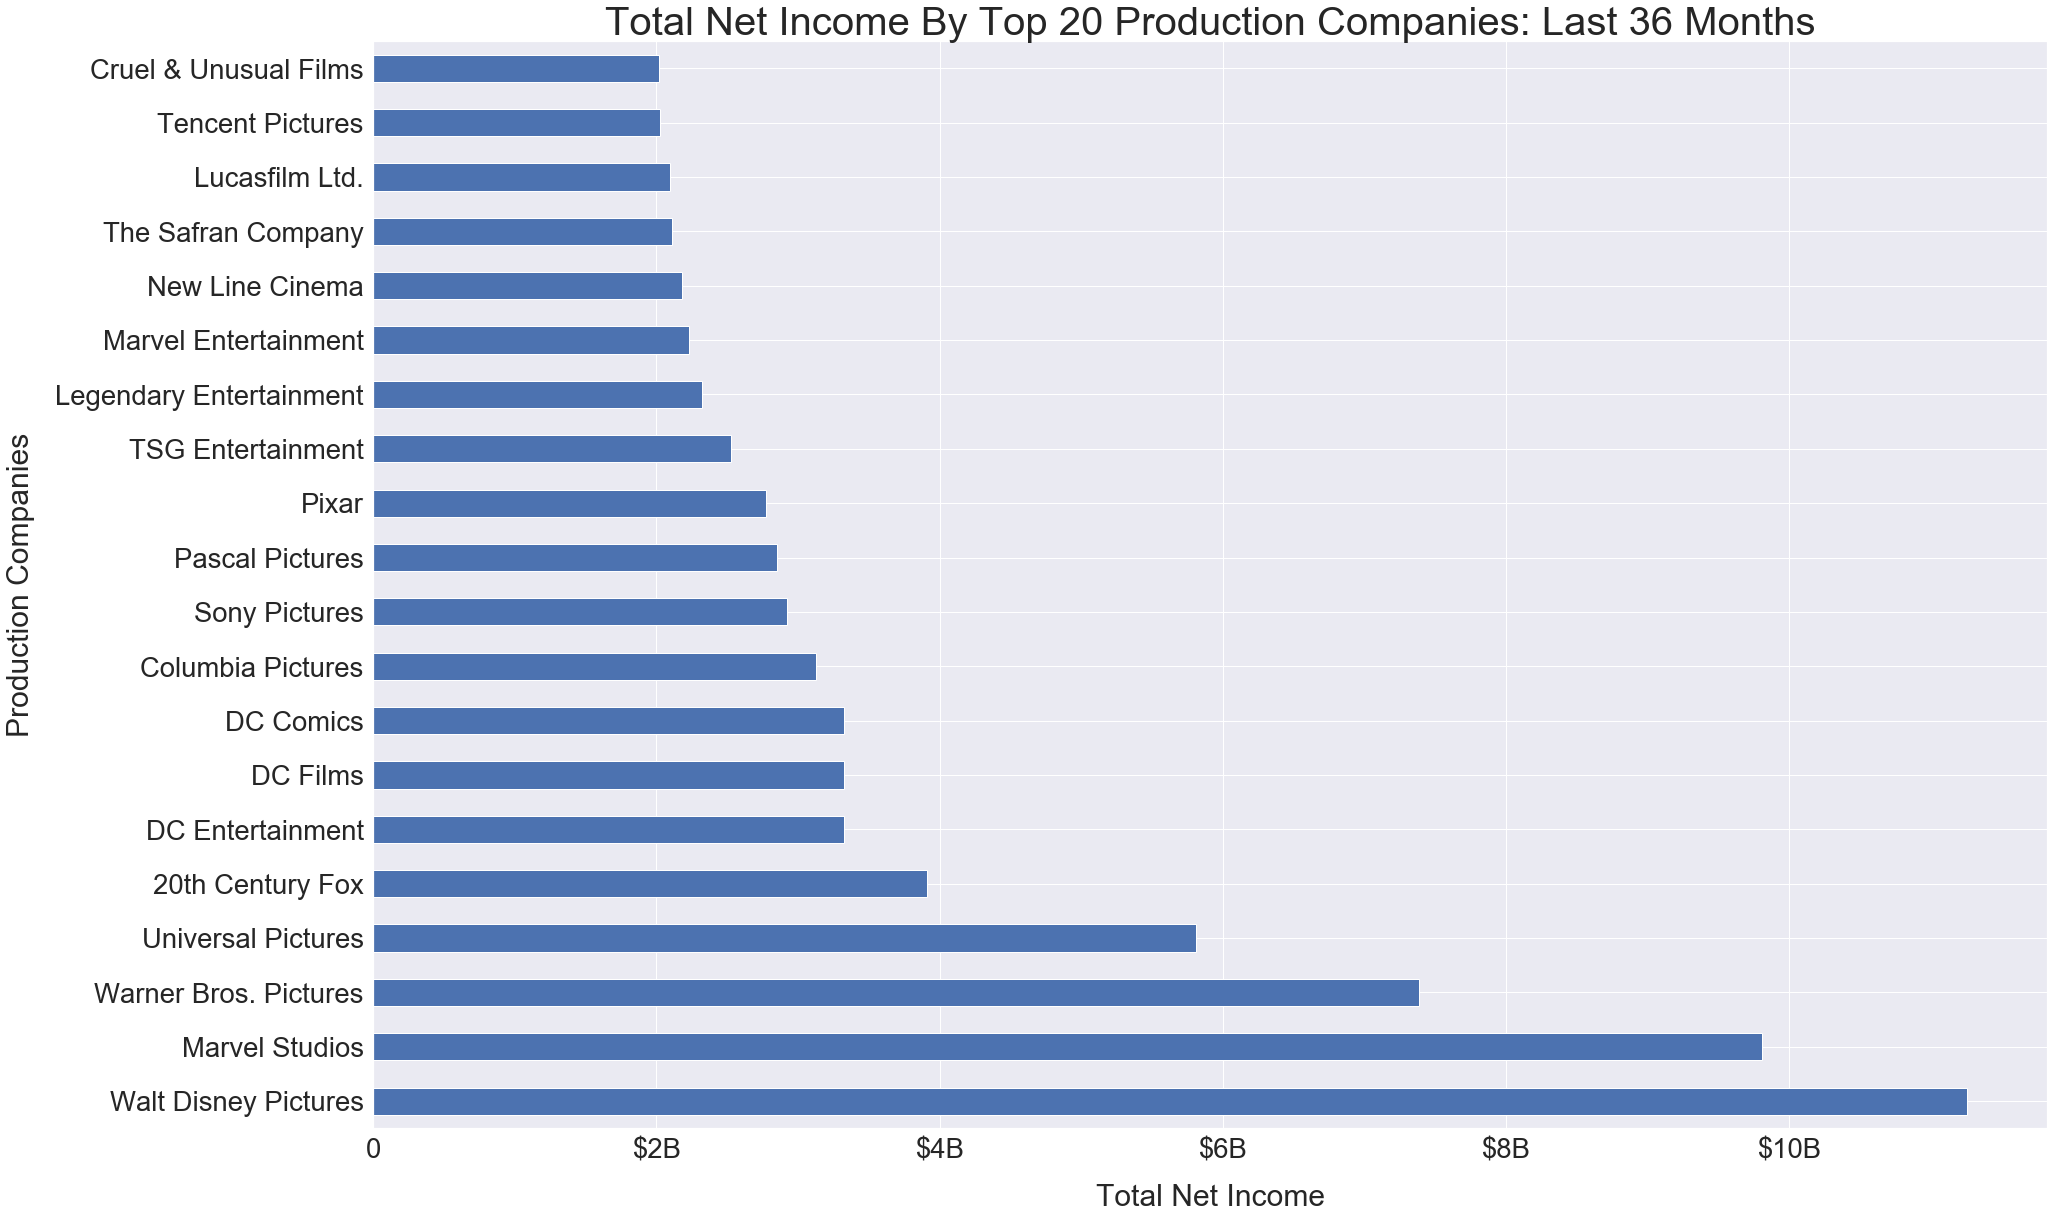

In [44]:
#Creating the visualization using Seaborn

fig,ax = plt.subplots()
sns.set(font_scale=3.5)
ctn.plot(kind='barh',figsize=(30,20),ax=ax)
plt.xlabel('Total Net Income',labelpad=20)
plt.ylabel('Production Companies',labelpad=20)
plt.title('Total Net Income By Top 20 Production Companies: Last 36 Months', y=1.0, fontsize=40)

#Removing the legend as I think it's unnecessary in this situation.
ax.legend().set_visible(False)
ax.xaxis.set_major_formatter(tickie.FuncFormatter(reformat_money))

plt.show()

## Now: In Which Genres Are These Films?

Now, I'd like to investigate which genres are most prevalent within the top-earning films, so as to combine with these insights showing the production companies that have been involved wit these "most successful" films in the last 3 years.

One thing the above chart reveals which is important: top, well-known major studios are not just blowing through capital, they appear to be profitable. Moreover, and perhaps to be expected: the production companies connected with the highest net income from the respective films are a cut above the rest.

It would be valuable to investigate the specific focus of these companies. It <i>appears that</i> films in the areas of comic book, Disney and Pixar <i>characters</i> could be prevalent on the list, but let's dig in more.

In [57]:
#Leveraging a list comprehension as before inside of a function to loop through the dataframe effectively.

def cool_func_genres(row):

    genres = [c['name'] for c in row['genres']]
    letsgo = {}
    genres_list = []
    
    for i in genres:
        letsgo[i] = 1
        genres_list.append(i)
        unique_genres_list = set(genres_list)
        #Just in case I need this later, creating a list of unique genres
        ugl = list(unique_genres_list)
            
    return letsgo

In [46]:
#Now, to use the Apply method to run the Function above, so as to populate the DataFrame.
genre_top_dict = grand_df.apply(lambda r: cool_func_genres(r), axis=1).to_list()
genre_top_dict

[{'Adventure': 1, 'Science Fiction': 1, 'Action': 1},
 {'Adventure': 1, 'Action': 1, 'Science Fiction': 1},
 {'Adventure': 1, 'Family': 1, 'Music': 1},
 {'Animation': 1, 'Family': 1, 'Adventure': 1},
 {'Action': 1, 'Adventure': 1, 'Fantasy': 1, 'Science Fiction': 1},
 {'Action': 1, 'Adventure': 1, 'Science Fiction': 1},
 {'Science Fiction': 1, 'Action': 1, 'Adventure': 1},
 {'Family': 1, 'Fantasy': 1, 'Romance': 1},
 {'Action': 1, 'Adventure': 1, 'Animation': 1, 'Family': 1},
 {'Crime': 1, 'Thriller': 1, 'Drama': 1},
 {'Action': 1, 'Crime': 1, 'Thriller': 1},
 {'Action': 1, 'Adventure': 1, 'Fantasy': 1},
 {'Action': 1, 'Adventure': 1, 'Science Fiction': 1},
 {'Action': 1, 'Adventure': 1, 'Science Fiction': 1},
 {'Adventure': 1, 'Animation': 1, 'Comedy': 1, 'Family': 1, 'Fantasy': 1},
 {'Adventure': 1, 'Fantasy': 1, 'Romance': 1, 'Family': 1},
 {'Drama': 1, 'Music': 1},
 {'Action': 1, 'Adventure': 1, 'Science Fiction': 1},
 {'Science Fiction': 1, 'Action': 1},
 {'Action': 1, 'Adventure'

In [59]:
#Now, I'll tally up the number of times each genre is mentioned within the last 36 months' top-earning film list.
genre_top_tot = pd.DataFrame(genre_top_dict).sum().sort_values(ascending=False)
genre_top_tot

Action             92.0
Drama              90.0
Thriller           72.0
Adventure          70.0
Comedy             62.0
Science Fiction    59.0
Fantasy            42.0
Horror             37.0
Crime              32.0
Family             28.0
Romance            25.0
Mystery            22.0
Animation          21.0
History             7.0
War                 6.0
Music               4.0
TV Movie            1.0
dtype: float64

### Action + Drama FTW

Clearly, action and drama films are the most present in this list. Could going (mostly) all in on these two genres be the secret sauce to successful movie production? Although there are more aspects to consider to be sure, we can see that as it relates to the most income-positive films released in the last 36 months, action and drama take the cake.

OK, now to create a nice visualization. I'll use a variation of a Treemap I discovered.

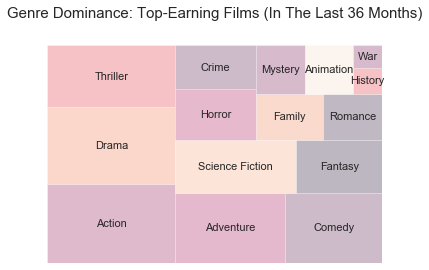

In [49]:
# Guidance obtained from these sources -- https://github.com/laserson/squarify 
#and https://python-graph-gallery.com/treemap/

x = 0
y = 0
width = 2000
height = 1250

#Removed the last 3 values in the dataframe to create well-organized visualization.
top_genre_viz = squarify.normalize_sizes(genre_top_tot.iloc[:15],width,height)
squarify.plot(sizes=top_genre_viz, label=genre_top_tot.index, alpha=.3, text_kwargs={'fontsize':11})

plt.title('Genre Dominance: Top-Earning Films (In The Last 36 Months)', y=1.1, fontsize=15)
plt.axis('off')
plt.show()

## Takeaway Update #1: Choose Action + Drama Films With Confidence

The "Action" and "Drama" categories clearly stand out as it relates to films released in the last 36 months, and <i>investing</i> in producing these types of films seems to be a path worth exploring.

I thought that maybe <i>Animation</i> films would be higher with Walt Disney Studios being the top-earner (and it's worth delving deeper into which genre category Walt Disney specifically focuses on most, but the data does show that action films are most prevalent among the top-earners in the last 36 months!

---

##  🧗🏿 🌍 👨🏿‍🚀 Second Question:

## Is there a positive correlation between popularity and income in the last 36 months?

Now, my next goal is related to popularity and income. Without knowing <i>exactly</i> how each production company calculates its profits of course, the "net_income" column is what I've decided to use as a way to get a baseline sense. 

Since I've already done some cleaning for the last question related to net income, I'll review whether I can use some of the same code to find out more about the films with (arguably) the worst financial performance of the last 36 months, and whether these correlate to popularity scores.

I'll check on the entire list of films as well, to compare with the bottom-earners insights.

In [137]:
#Simple grouping that shows the net income for films released in the last 36 months.

simpl = grand_df.loc[:,['title','popularity','net_income']].sort_values(by=['net_income'],ascending=True)
simpl_for_plot = simpl.iloc[:100,:]
simpl_for_plot

title  popularity  net_income
622                                The Irishman      22.132  -151000000
690                               6 Underground      21.545  -150000000
767          The Nutcracker and the Four Realms      20.965   -60477354
195  Journey to China: The Mystery of Iron Mask      30.025   -49000000
664                     The Cloverfield Paradox      21.758   -45000000
..                                          ...         ...         ...
990                                  Brightburn      19.716    26893421
153                                Doctor Sleep      32.080    27281712
973                     The Mountain Between Us      19.781    27832209
124                     Fighting with My Family      34.031    28055536
475                           A Wrinkle in Time      23.658    29675864

[100 rows x 3 columns]

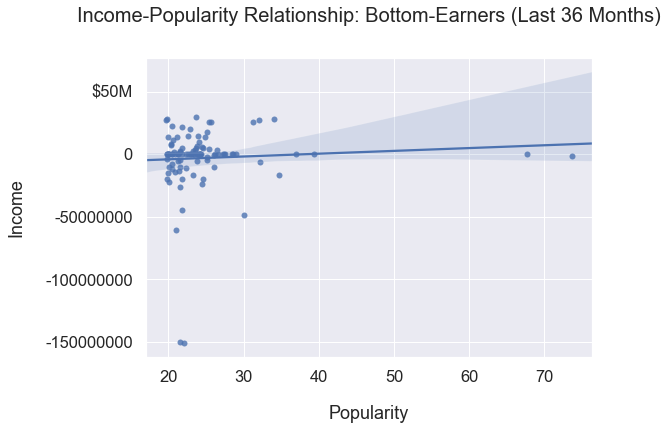

In [138]:
pop_net_neg = simpl_for_plot
sns.set(font_scale=1.5)
fig,ax = plt.subplots()
# use the function regplot to make a scatterplot
sns.regplot(x=pop_net_neg["popularity"], y=pop_net_neg["net_income"], ax=ax, marker='o')

plt.xlabel('Popularity',labelpad=20)
plt.ylabel('Income',labelpad=20)
plt.title('Income-Popularity Relationship: Bottom-Earners (Last 36 Months)', y=1.1, fontsize=20)

#Removing the legend as I think it's unnecessary in this situation.
#ax.legend().set_visible(False)
ax.yaxis.set_major_formatter(tickie.FuncFormatter(reformat_money))

plt.show()

## As Income Goes (Down) So Does Popularity?

OK! So, it seems that poplularity score and income have a positive correlation, at least with respect to films released in the last 36 months. However, to further cement the correlation, we would need to see a similar positive correlation with the top-earning films as well. Let's take a look.

In [ ]:
#Reversing the sorting from the previous simpl variable

simpl_top = grand_df.loc[:,['title','popularity','net_income']].sort_values(by=['net_income'],ascending=False)
simpl_top

In [6]:
#Now, time to create the second scatterplot.

pop_net_pos = simpl_top
sns.set(font_scale=1.5)
fig,ax = plt.subplots()
# use the function regplot to make a scatterplot
sns.regplot(x=pop_net_pos["popularity"], y=pop_net_pos["net_income"], ax=ax, marker='o')

plt.xlabel('Popularity',labelpad=20)
plt.ylabel('Income',labelpad=20)
plt.title('Income-Popularity Relationship: Top-Earners (Last 36 Months)', y=1.1, fontsize=20)

#Removing the legend as I think it's unnecessary in this situation.
#ax.legend().set_visible(False)
ax.yaxis.set_major_formatter(tickie.FuncFormatter(reformat_money))

plt.show()

NameError: name 'simpl_top' is not defined

## Takeaway #2: More Money More (Popularity) Problems?

Interestingly enough, it looks like there's not as much positive correlation between income and popularity scores as the bottom-earners' insights showed. One can see above that it's <i>more than possible</i> for a film to rake in a significant amount of money <b>without</b> receiving a high popularity score within TMDb.

Could it be that <b>genre popularity</b> is more reliable than movie popularity?

---

## 🧗🏿 🌍 👨🏿‍🚀 Third Question:

### Which 10 non-English language films have the highest popularity score in the last 5 years?